<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/Pendulum_Dynamics_with_Time_Delayed_Memory_Effect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

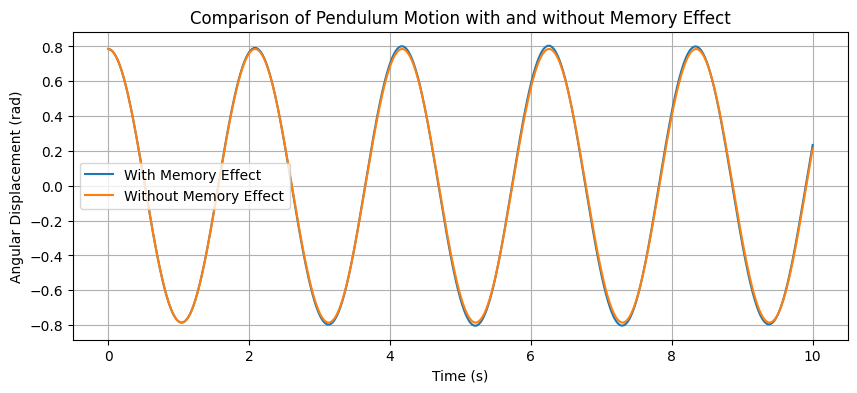

In [12]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from collections import deque

# Define constants and parameters
I = 1.0  # Moment of inertia
m = 1.0  # Mass
g = 9.81  # Acceleration due to gravity
l = 1.0  # Length of the pendulum
T0 = 0.1  # Memory effect constant
time_delay = 1.0  # Time delay for memory effect
memory_saturation = 1e10  # Saturation limit for the memory effect

# Define a modified entropy function for a time-delayed memory effect
def entropy(r, t):
    if t < time_delay:
        return 0.0  # No memory effect initially
    else:
        return np.sin(2 * np.pi * (t - time_delay))  # Memory effect with sinusoidal variation

# Define a deque to hold recent theta values and associated times
delta_t = 10.0 / 1000  # Assuming fixed time steps, this is derived from your linspace call below
theta_history = deque(maxlen=int(time_delay / delta_t) + 1)

# Define a memory operator that limits the amplitude of the memory effect
def memory_operator(state, t):
    theta = state[0]

    # Add current theta to history
    theta_history.append((t, theta))

    # Remove values outside of the time_delay window
    while theta_history and theta_history[0][0] <= t - time_delay:
        theta_history.popleft()

    # Compute integral over the last time_delay seconds
    integral_theta = sum(x[1] for x in theta_history) * delta_t

    memory_term = T0 * entropy(0.0, t) * integral_theta

    # Apply a nonlinear function to dampen the memory term
    memory_term = np.tanh(memory_term / memory_saturation) * memory_saturation

    return memory_term

# Define the derivative function for the ODE (with memory effect)
def deriv_with_memory(state, t):
    theta = state[0]
    theta_dot = state[1]
    dtheta_dt = theta_dot
    ddtheta_dt2 = (-m * g * l * np.sin(theta) - memory_operator(state, t)) / I
    return [dtheta_dt, ddtheta_dt2]

# Define the derivative function for the ODE (without memory effect)
def deriv_no_memory(state, t):
    theta = state[0]
    theta_dot = state[1]
    dtheta_dt = theta_dot
    ddtheta_dt2 = (-m * g * l * np.sin(theta)) / I
    return [dtheta_dt, ddtheta_dt2]

# Initial conditions
theta_initial = np.pi / 4.0  # Initial angular displacement
theta_dot_initial = 0.0  # Initial angular velocity

# Time values
t = np.linspace(0.0, 10.0, 1000)

# Solve the ODE (with memory effect)
theta_solution_with_memory = odeint(deriv_with_memory, [theta_initial, theta_dot_initial], t)

# Extract the angular displacement from the solution (with memory effect)
theta_values_with_memory = theta_solution_with_memory[:, 0]

# Solve the ODE (without memory effect)
theta_solution_no_memory = odeint(deriv_no_memory, [theta_initial, theta_dot_initial], t)

# Extract the angular displacement from the solution (without memory effect)
theta_values_no_memory = theta_solution_no_memory[:, 0]

# Plot the results for both cases
plt.figure(figsize=(10, 4))
plt.plot(t, theta_values_with_memory, label='With Memory Effect')
plt.plot(t, theta_values_no_memory, label='Without Memory Effect')
plt.xlabel('Time (s)')
plt.ylabel('Angular Displacement (rad)')
plt.title('Comparison of Pendulum Motion with and without Memory Effect')
plt.legend()
plt.grid(True)
plt.show()


Core Idea:
The motion of a simple pendulum is governed by Newton's second law and is described by a second-order differential equation. The motion is affected by gravity, and in a frictionless world, the pendulum will keep swinging indefinitely. In the real world, air resistance and other factors damp the motion. The model provided introduces another factor to the pendulum's motion, which is a memory effect.

Components of the Model:
Pendulum Parameters:

I: Moment of inertia. It represents the pendulum's resistance to rotational motion about its axis.
m: Mass of the pendulum.
g: Acceleration due to gravity.
l: Length of the pendulum.
Memory Effect:

The model introduces a memory effect which provides an additional torque on the pendulum based on its past angular positions.
T0: This is a constant that scales the strength of the memory effect.
time_delay: Represents how far back in time the pendulum 'remembers' its position.
memory_saturation: Acts as an upper bound to ensure that the memory effect doesn't grow too strong and destabilize the system. It's used in conjunction with a nonlinear tanh function.
Entropy Function (entropy):

This function describes how the memory effect varies over time. It introduces a time-delayed sinusoidal variation to the memory effect, such that the memory effect is zero initially (for times less than time_delay) and then follows a sine wave pattern afterward.
Memory Operator (memory_operator):

Computes the additional torque on the pendulum due to the memory effect. This torque is influenced by the cumulative memory (integral of past angular positions) and the entropy function.
ODE Functions (deriv_with_memory and deriv_no_memory):

These functions compute the rate of change of the pendulum's angular position and angular velocity.
deriv_with_memory includes the effects of gravity and the memory operator.
deriv_no_memory only considers the effects of gravity and acts as a baseline to compare against the memory-augmented model.
ODE Integration and Visualization:

The model uses the odeint function from scipy.integrate to solve the differential equations and compute the pendulum's motion over time.
Results are then plotted to visualize and compare the motion of the pendulum with and without the memory effect.
What Does the Model Do?
The model simulates the motion of a pendulum under the influence of gravity, with an added memory effect. The memory effect introduces an additional torque based on the pendulum's past positions, modulated by an entropy function. By comparing the pendulum's motion with and without this memory effect, one can see how "remembering" past positions alters the dynamics of the system.

This kind of model can be insightful for studying systems where past states influence current behavior, which could be applicable in various scientific and engineering domains.




